# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        pprint(city_weather)
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | valparaiso
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.0393, 'lon': -71.6273},
 'dt': 1699915858,
 'id': 3868626,
 'main': {'feels_like': 16.27,
          'humidity': 61,
          'pressure': 1020,
          'temp': 16.93,
          'temp_max': 19.8,
          'temp_min': 16.93},
 'name': 'Valparaíso',
 'sys': {'country': 'CL',
         'id': 2034956,
         'sunrise': 1699868279,
         'sunset': 1699917822,
         'type': 2},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 190, 'speed': 4.63}}
Processing Record 2 of Set 1 | edinburgh of the seven seas
{'base': 'stations',
 'clouds': {'all': 7},
 'cod': 200,
 'coord': {'lat': -37.0676, 'lon': -12.3116},
 'dt': 1699915965,
 'id': 3370726,
 'main': {'feels_like': 13.1

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,valparaiso,-33.0393,-71.6273,19.80,61,0,4.63,CL,1699915858
1,edinburgh of the seven seas,-37.0676,-12.3116,13.62,79,7,11.38,SH,1699915965
2,maumere,-8.6199,122.2111,28.11,74,82,2.30,ID,1699916132
3,port alfred,-33.5906,26.8910,14.54,93,98,5.29,ZA,1699916060
4,vadso,70.0744,29.7487,-8.91,86,75,7.20,NO,1699915913


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,valparaiso,-33.0393,-71.6273,19.80,61,0,4.63,CL,1699915858
1,edinburgh of the seven seas,-37.0676,-12.3116,13.62,79,7,11.38,SH,1699915965
2,maumere,-8.6199,122.2111,28.11,74,82,2.30,ID,1699916132
3,port alfred,-33.5906,26.8910,14.54,93,98,5.29,ZA,1699916060
4,vadso,70.0744,29.7487,-8.91,86,75,7.20,NO,1699915913


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

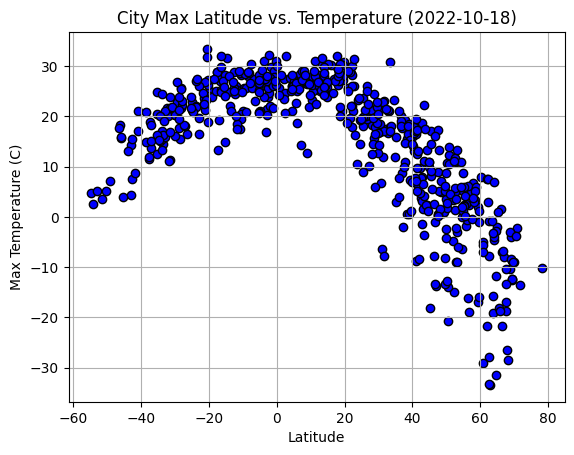

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../Output Data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

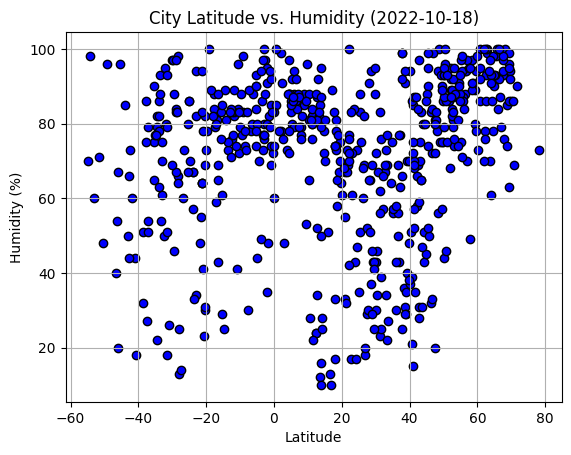

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../Output data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

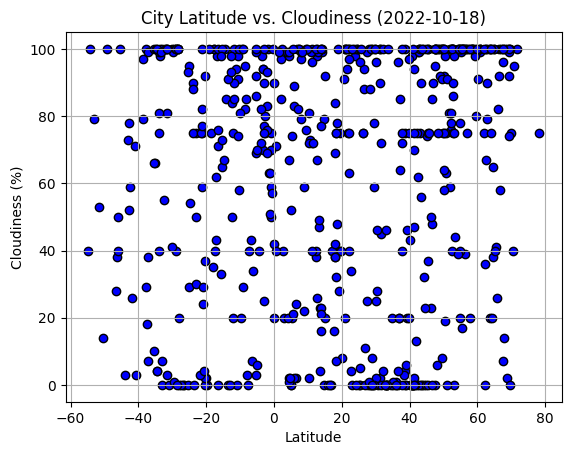

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../Output data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

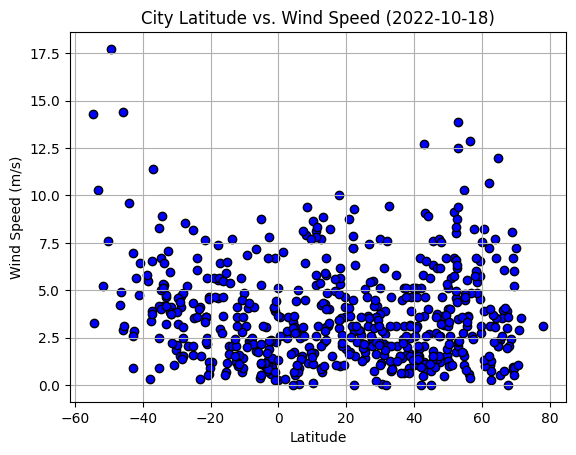

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../Output data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,vadso,70.0744,29.7487,-8.91,86,75,7.20,NO,1699915913
5,kohtla-jarve,59.3986,27.2731,1.96,89,100,4.51,EE,1699916135
13,san patricio,28.0170,-97.5169,18.24,91,100,5.49,US,1699915946
14,vorgashor,67.5833,63.9500,-16.88,93,96,2.99,RU,1699915640
18,bandon,51.7469,-8.7425,11.77,86,81,9.15,IE,1699916154


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,valparaiso,-33.0393,-71.6273,19.80,61,0,4.63,CL,1699915858
1,edinburgh of the seven seas,-37.0676,-12.3116,13.62,79,7,11.38,SH,1699915965
2,maumere,-8.6199,122.2111,28.11,74,82,2.30,ID,1699916132
3,port alfred,-33.5906,26.8910,14.54,93,98,5.29,ZA,1699916060
6,uturoa,-16.7333,-151.4333,27.05,81,98,5.52,PF,1699915592


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7159261101755756


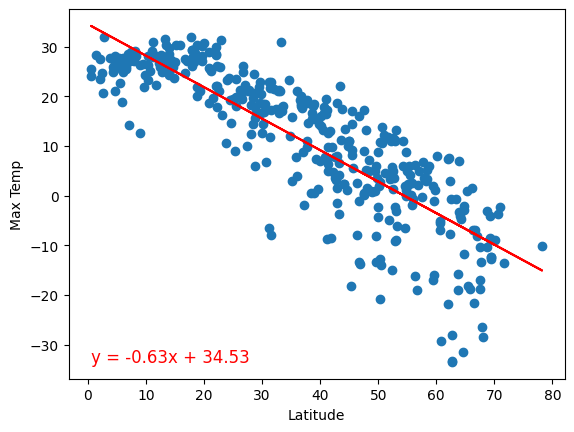

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"R squared: {rvalue**2}")

R squared: 0.5479236405804421


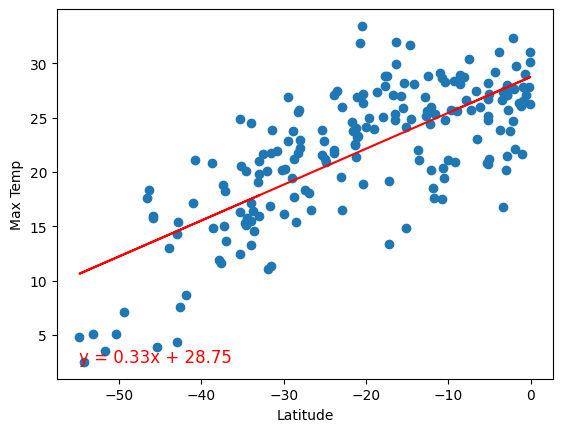

In [21]:
# Linear regression on Southern Hemisphere
x_values2 = southern_hemi_df["Lat"]
y_values2 = southern_hemi_df["Max Temp"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values2, y_values2)
regress_values = x_values2 * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.scatter(x_values2, y_values2)
plt.plot(x_values2, regress_values, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (x_values2.min(), y_values2.min()), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"R squared: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.07188773014489455


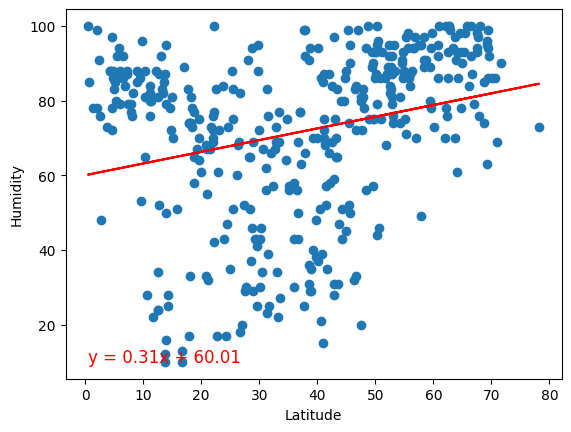

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"R squared: {rvalue**2}")

R squared: 0.06964636539305326


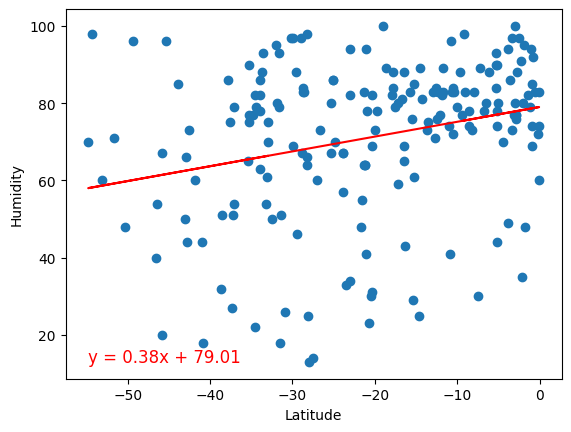

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"R squared: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.03053671968721819


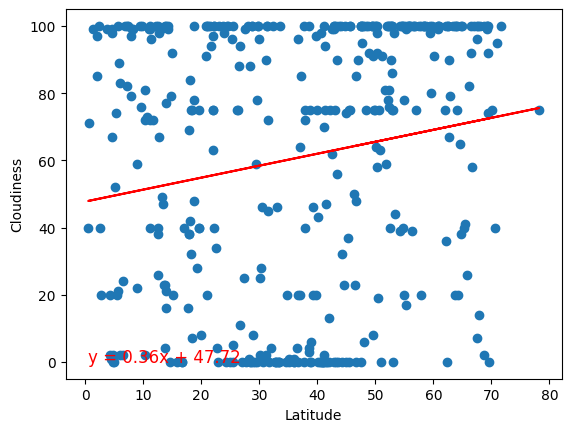

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"R squared: {rvalue**2}")

R squared: 0.010700680482678594


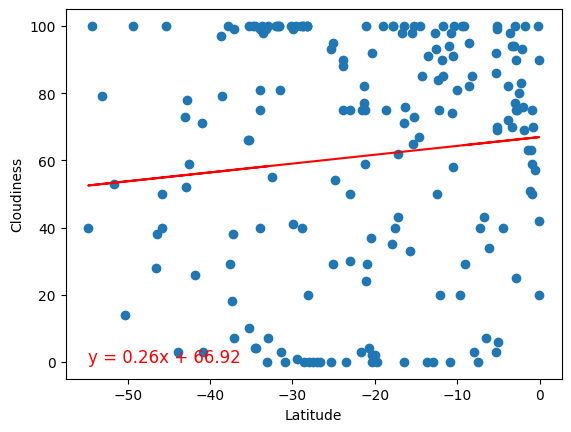

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"R squared: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.0038073333483359603


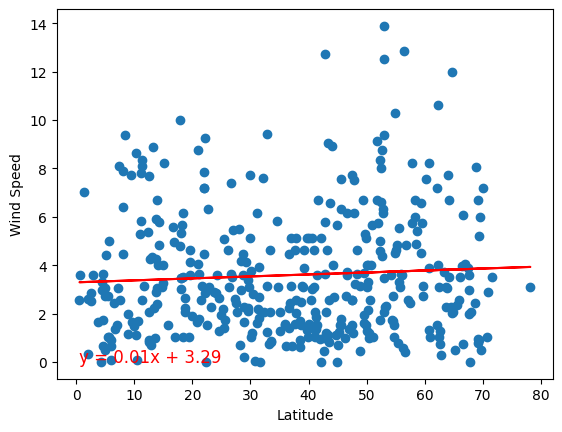

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"R squared: {rvalue**2}")

R squared: 0.18602539657848755


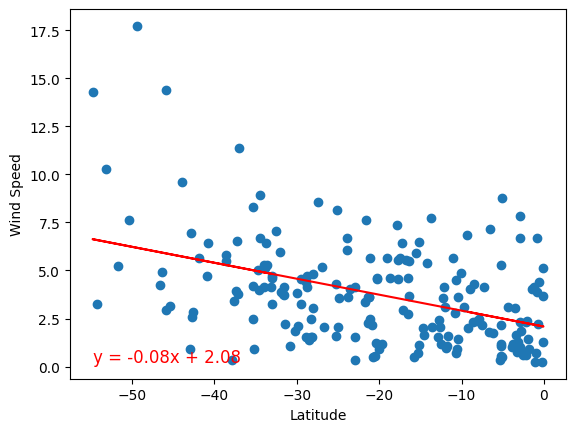

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"R squared: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE